<a href="https://colab.research.google.com/github/wahyukusuma/MobileAccelerometer/blob/master/Simple_Static_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
#
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [0]:
from sklearn.utils import shuffle
train = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/train.csv", index_col ="Activity")
test = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/test.csv", index_col ="Activity")
train = shuffle(train)
test = shuffle(test)
#display(train)

# Print Activity ROW

In [4]:
train.index.unique()

Index(['SITTING', 'WALKING_DOWNSTAIRS', 'STANDING', 'LAYING', 'WALKING',
       'WALKING_UPSTAIRS'],
      dtype='object', name='Activity')

# Select Activity

In [0]:
StaticTrain = train.loc[['STANDING', 'LAYING', 'SITTING']]
StaticTest = test.loc[['STANDING', 'LAYING', 'SITTING']]

In [6]:
#display(StaticTrain)
StaticTrain.index.unique()

Index(['STANDING', 'LAYING', 'SITTING'], dtype='object', name='Activity')

In [0]:
subject_training_data = StaticTrain['subject']
subject_testing_data = StaticTest['subject']
StaticTrain = StaticTrain.drop(['subject'], axis=1)
StaticTest = StaticTest.drop(['subject'], axis=1)

training_labels = StaticTrain.index
testing_labels = StaticTest.index
StaticTrain.reset_index(drop=True, inplace=True)
StaticTest.reset_index(drop=True, inplace=True)

In [8]:
print ("Training data consists of {} instances of data with {} total features".format(StaticTrain.shape[0], StaticTrain.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 4067 instances of data with 561 total features
Training data includes value counts of
 LAYING      1407
STANDING    1374
SITTING     1286
Name: Activity, dtype: int64


Testing data consists of 2947 instances of data
Testing data includes value counts of
 LAYING      537
STANDING    532
SITTING     491
Name: Activity, dtype: int64


In [9]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(StaticTrain.select_dtypes(include=numerics).columns)
X_train = StaticTrain#[numerical_vars]
X_train.shape
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.269095,-0.024308,-0.119992,-0.992318,-0.948318,-0.964227,-0.992410,-0.942758,-0.961982,-0.940483,-0.561613,-0.806060,0.839750,0.668840,0.832513,-0.969561,-0.999924,-0.999202,-0.998730,-0.991180,-0.946466,-0.956624,-0.652148,-0.477451,-0.552684,0.116566,-0.159140,0.139341,-0.128491,0.124623,-0.115329,0.186592,-0.232312,0.137497,-0.099761,-0.037188,-0.037689,0.623701,0.762122,0.741464,...,-0.999939,-0.992619,-1.000000,-0.777778,0.508459,-0.597147,-0.855141,-0.980382,-0.967826,-0.972531,-0.963453,-0.991660,-0.980382,-0.999426,-0.984967,-0.636798,-1.000000,-0.319859,0.199173,-0.103031,-0.996127,-0.996141,-0.996087,-0.995409,-0.996141,-0.996127,-0.999981,-0.995763,-0.955696,-1.000000,0.336734,-0.166813,-0.436274,0.001550,-0.063198,-0.498705,0.552507,-0.670451,0.218216,0.217855
1,0.276509,-0.018460,-0.104636,-0.996821,-0.975508,-0.989327,-0.997418,-0.974952,-0.990763,-0.939362,-0.558311,-0.814476,0.849929,0.683027,0.837662,-0.991086,-0.999982,-0.999789,-0.999783,-0.998268,-0.977128,-0.991287,-0.717741,-0.549184,-0.474336,0.225732,0.040545,-0.179370,0.398450,0.079662,-0.038415,0.200428,0.067013,0.476377,-0.322592,0.360095,-0.133191,0.201735,-0.129874,-0.152715,...,-0.999872,-0.993945,-1.000000,-0.841270,0.428851,-0.786462,-0.909578,-0.988764,-0.985898,-0.985908,-0.984669,-0.997744,-0.988764,-0.999849,-0.991324,-0.707158,-1.000000,-0.091846,-0.136781,-0.447748,-0.992990,-0.993756,-0.992904,-0.993720,-0.998268,-0.992990,-0.999957,-0.991876,-0.955696,-1.000000,0.318876,-0.406624,-0.675589,0.067742,-0.031147,0.197229,0.607685,-0.898354,0.168121,0.010300
2,0.298261,-0.020726,-0.045002,-0.969504,-0.908615,-0.901087,-0.970916,-0.909465,-0.892239,-0.901597,-0.533154,-0.731745,0.831868,0.644857,0.827860,-0.919184,-0.999320,-0.998042,-0.988414,-0.972811,-0.929847,-0.872521,0.013323,-0.254236,0.253702,-0.212083,0.255688,-0.099811,-0.065628,0.041065,-0.051803,0.118657,0.031875,-0.294489,0.251497,-0.172015,-0.135064,0.322417,0.244955,0.567026,...,-0.998775,-0.956521,-0.940965,-1.000000,0.097733,-0.339134,-0.630480,-0.928428

In [10]:
numerical_vars = list(StaticTest.select_dtypes(include=numerics).columns)
X_test = StaticTest#[numerical_vars]
X_test.shape
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.279690,-0.012684,-0.103069,-0.997212,-0.977669,-0.989313,-0.997728,-0.977087,-0.988814,-0.942717,-0.557917,-0.815443,0.851017,0.691149,0.843115,-0.990363,-0.999984,-0.999784,-0.999762,-0.998458,-0.979739,-0.988260,-0.689639,-0.390293,-0.462740,0.115695,-0.069319,0.038287,0.177694,0.122723,-0.089242,0.074585,0.128524,0.325198,-0.234284,0.106651,0.050587,0.155524,-0.009132,0.425284,...,-0.999962,-0.994604,-1.000000,-0.968254,0.715212,-0.720144,-0.886210,-0.994816,-0.994921,-0.994390,-0.995484,-0.996608,-0.994816,-0.999965,-0.995657,-0.896695,-1.0,0.167521,-0.536494,-0.822335,-0.996824,-0.997665,-0.996922,-0.998591,-0.989683,-0.996824,-0.999988,-0.995698,-1.000000,-0.777778,0.371067,-0.779160,-0.968156,-0.046149,0.070511,-0.343793,-0.511568,-0.842342,0.193233,-0.037724
1,0.277273,-0.010684,-0.111803,-0.991990,-0.948224,-0.947707,-0.992526,-0.952241,-0.945071,-0.934487,-0.530991,-0.803251,0.844419,0.676565,0.819853,-0.968449,-0.999934,-0.999217,-0.998041,-0.992000,-0.968684,-0.941158,-0.523683,-0.220569,-0.357930,0.397492,-0.307328,0.376796,0.028995,-0.034041,-0.150141,0.366061,-0.044588,0.163101,-0.153340,0.258816,-0.324861,-0.140117,-0.022218,0.430998,...,-0.999661,-0.979559,-1.000000,-0.841270,0.640960,-0.688219,-0.902201,-0.825796,-0.647596,-0.750094,-0.603712,-0.775421,-0.825796,-0.945315,-0.952356,-0.393483,-1.0,-0.475743,0.441316,0.120676,-0.979392,-0.980435,-0.977359,-0.982944,-0.983977,-0.979392,-0.999726,-0.974300,-0.658280,-0.873016,-0.047956,-0.299252,-0.686495,0.108168,-0.018954,-0.995039,-0.924225,-0.766706,0.232062,0.110544
2,0.277538,-0.018087,-0.121850,-0.997143,-0.973144,-0.987617,-0.997792,-0.970482,-0.987003,-0.938504,-0.563752,-0.821096,0.851113,0.682679,0.834498,-0.987003,-0.999984,-0.999758,-0.999491,-0.998365,-0.975101,-0.987049,-0.669275,-0.482932,-0.824727,0.412098,-0.123042,0.207203,0.213541,0.313145,-0.288289,0.143497,0.152672,0.153868,-0.012893,-0.070965,-0.075294,0.157524,-0.068655,0.019479,...,-0.999873,-0.989733,-1.000000,-0.841270,0.235671,-0.624827,-0.893201,-0.986749,-0.977

In [0]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(["SITTING", "STANDING", "LAYING"])
#le = le.fit(["1", "2", "3", "4", "5", "6"])
enc_training_labels = le.transform(training_labels)
enc_testing_labels = le.transform(testing_labels)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
lr = LogisticRegression(max_iter = 1000)

In [0]:
def evaluateclf(clf):
    scores = cross_val_score(clf, StaticTrain, enc_training_labels)
    avg = scores.mean()
    return "performances: {}, \nAverage: {}".format(scores, avg)

In [32]:
print ("Logistic Regression {}".format(evaluateclf(lr)))

Logistic Regression performances: [0.97542998 0.97174447 0.97293973 0.98277983 0.98400984], 
Average: 0.977380768893684


In [0]:
lr.fit(StaticTrain,enc_training_labels)
y_pred=lr.predict(StaticTest)

In [34]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(enc_testing_labels, y_pred)
cnf_matrix

array([[537,   0,   0],
       [  0, 435,  56],
       [  0,  11, 521]])

In [0]:
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

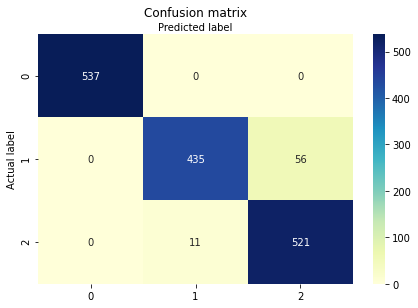

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print("Accuracy:",metrics.accuracy_score(enc_testing_labels, y_pred))
print("Precision:",metrics.precision_score(enc_testing_labels, y_pred, average='micro'))
print("Recall:",metrics.recall_score(enc_testing_labels, y_pred, average='macro'))

Accuracy: 0.9570512820512821
Precision: 0.9570512820512821
Recall: 0.9550901183712845
